# PCA(주성분분석)

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import probplot

## 1. 차원의 저주

- Feature or 변수가 많아질수록 데이터 공간의 부피가 기하급수적으로 증가 -> 데이터의 밀도가 희미해진다. -> overfitting의 문제가 발생할 여지가 있다.

## 2. 주성분 분석

### 1) 목적
- Data compression
    - 고차원의 데이터를 저차원으로 변환  데이터 압축 
    - 메모리/디스크 저장 공간 감소
    - Machine learning 알고리즘의 속도 증가
    - 2차원 평면에서 시각화를 통해 데이터 포인트 간의 관계, 기존 feature와의 관계를 시각적으로 파악 가능
    
- Visualization
    - 고차원의 데이터는 시각적으로 표현하기 어려움
    - 2차원 평면에서 시각화를 통해 데이터 포인트 간의 관계, 기존 feature 와의 관계를 시각적으로 파악 가능

### 2) 주성분 개수의 선택

- 총분산 설명하는 비주이 70 ~ 90%사이에서 선택
- 평균 고유값 $\sum_i \lambda_i/p$보다 작은 고유값을 갖는 주성분을 제거한다.
    - 표준화된 변수 사용 -> 1보다 작은 고유값을 제거 or 0.7보다 작은 고유값을 제거하는 것 제안
    
- ScreePlot 활용
    - $\lambda_i를 i에 대해 그린 그림$
    - 기울기가 가파른 상태에서 완만한 상태로 변화하는 점에 대응하는 값까지 보유

### 3) 예제

**올림픽 7종 경기 결과**
- 1988년 서울올림픽 25명 선수의 여자 7종경기 결과
- 100m 허들(hurdle), 투포환(shot), 높이뛰기(highjump), 200m 달리기(run200m), 멀리뛰기(longjump), 투창(javelin), 800m 달리기(run800m)
- 데이터의 구조를 탐색하고 득점 시스템에 의해 획득된 점수(score)와 어떻게 관련되는지 평가하려함
- 값이 클 수록 좋은 기록이 되도록 변환 후 분석 진행

In [3]:
df = pd.read_csv('heptathlon.csv',index_col = 0)

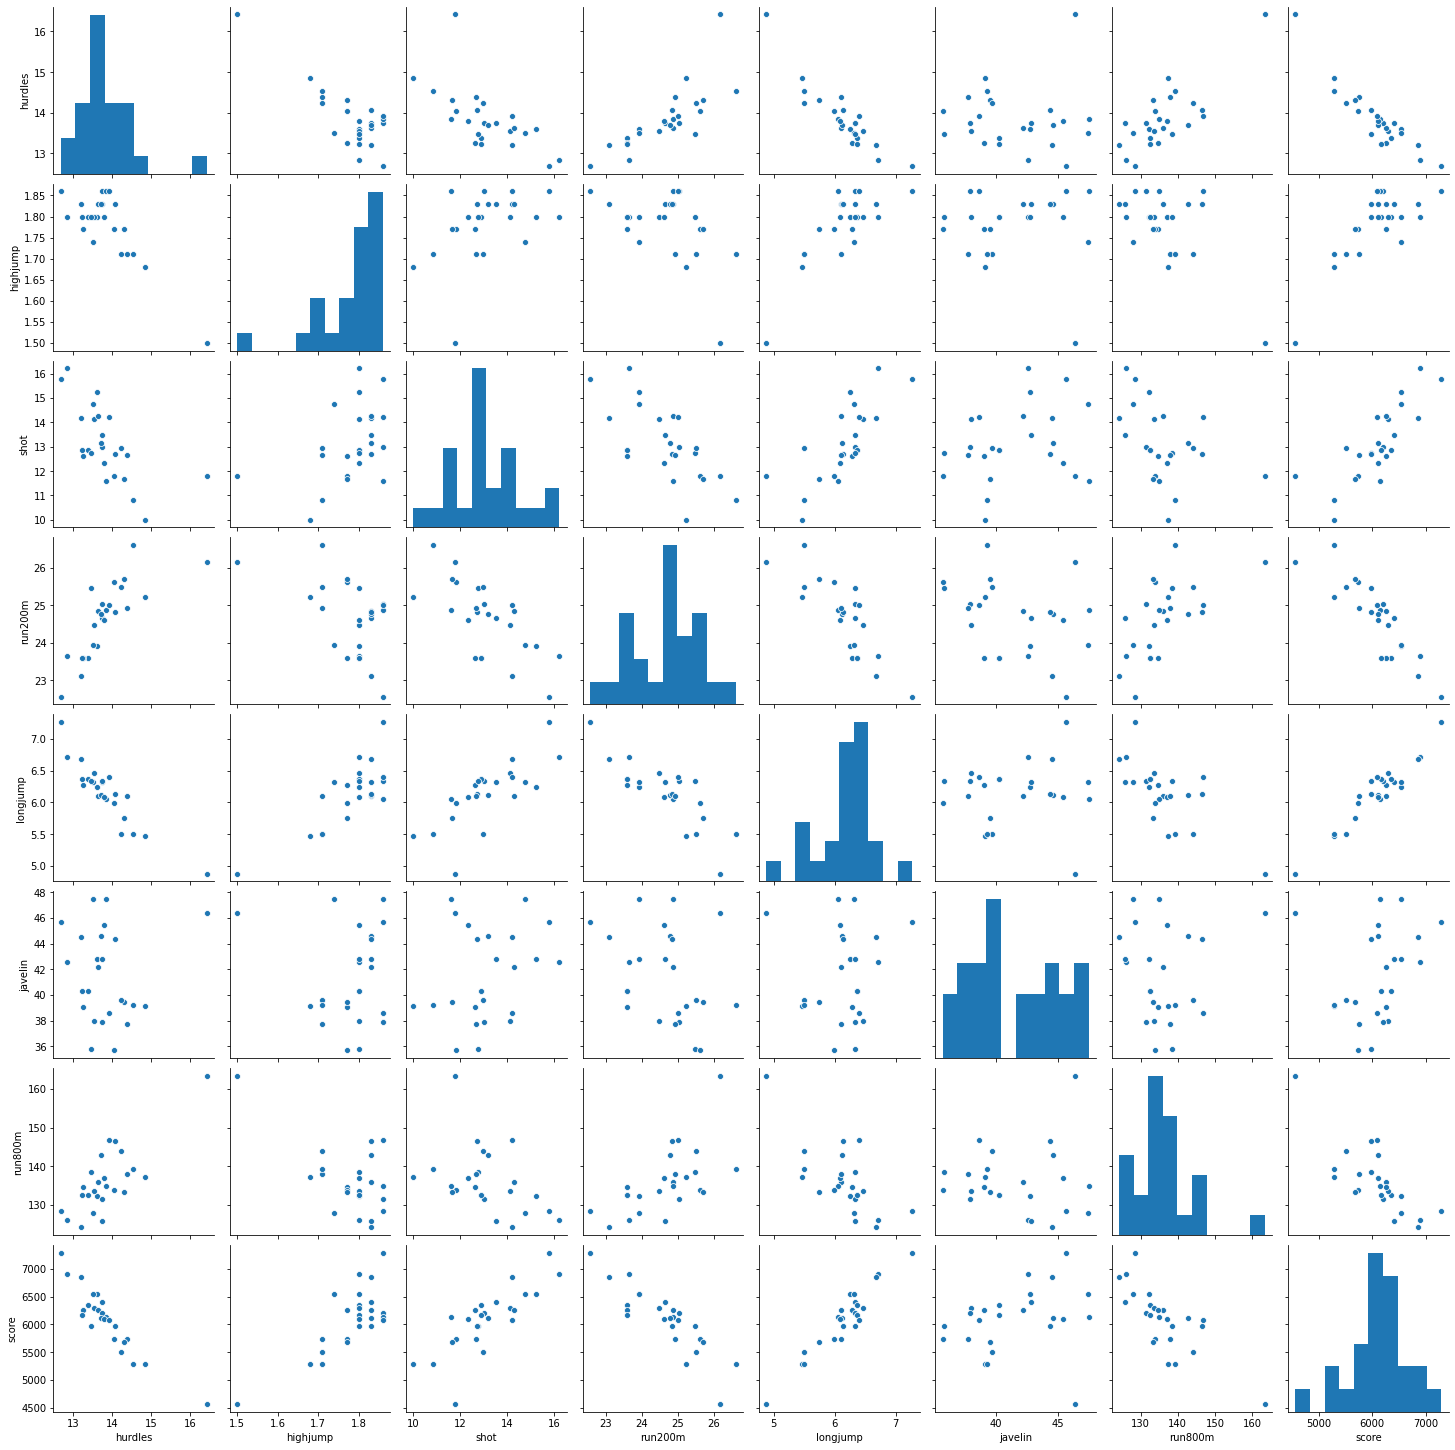

In [5]:
sns.pairplot(df)

In [9]:
df.tail()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Kytola (FIN),14.31,1.77,11.66,25.69,5.75,39.48,133.35,5686
Geremias (BRA),14.23,1.71,12.95,25.50,5.50,39.64,144.02,5508
Hui-Ing (TAI),14.85,1.68,10.00,25.23,5.47,39.14,137.30,5290
Jeong-Mi (KOR),14.53,1.71,10.83,26.61,5.50,39.26,139.17,5289
Launa (PNG),16.42,1.50,11.78,26.16,4.88,46.38,163.43,4566


In [12]:
df.hurdles = max(df.hurdles) - df.hurdles
df.run200m = max(df.run200m) - df.run200m
df.run800m = max(df.run800m) - df.run800m

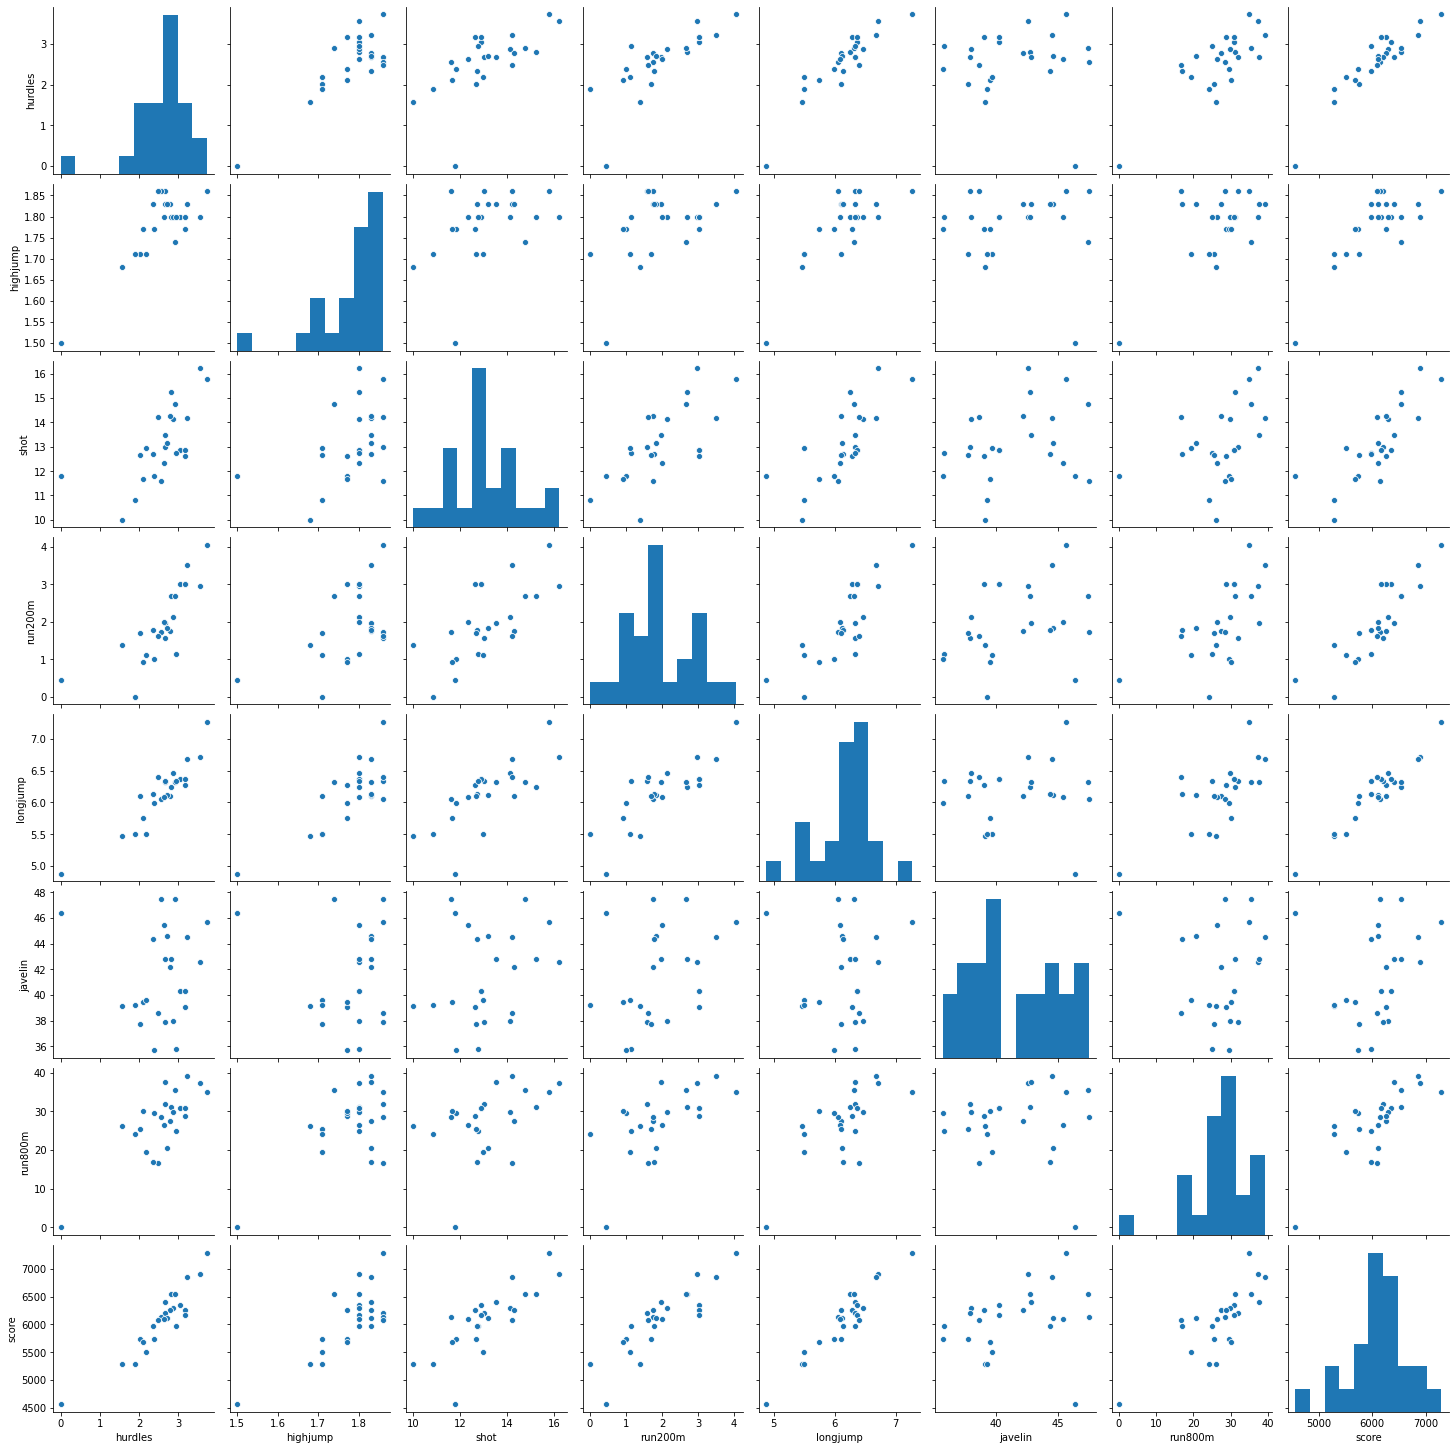

In [13]:
sns.pairplot(df)
plt.show()

In [15]:
df2 = df[~df.index.str.contains('PNG')].copy()

In [17]:
X = df2.iloc[:,:-1]

In [18]:
X.head()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
Joyner-Kersee (USA),3.73,1.86,15.80,4.05,7.27,45.66,34.92
John (GDR),3.57,1.80,16.23,2.96,6.71,42.56,37.31
Behmer (GDR),3.22,1.83,14.20,3.51,6.68,44.54,39.23
Sablovskaite (URS),2.81,1.80,15.23,2.69,6.25,42.78,31.19
Choubenkova (URS),2.91,1.74,14.76,2.68,6.32,47.46,35.53


In [19]:
X_scale = StandardScaler().fit_transform(X)

In [20]:
pca=PCA().fit(X_scale)

In [22]:
pca.explained_variance_ratio_ 

array([0.61766317, 0.12842778, 0.11853453, 0.06667967, 0.04261745,
       0.01626797, 0.00980943])

In [69]:
pca_result = pd.DataFrame(pd.DataFrame(x_reduced).std()).T

In [70]:
proportion = pca.explained_variance_ratio_
s = 0
result = []
for i in range(len(proportion)) :
    s = s+ proportion[i]
    result.append(np.round(s,4))

In [71]:
pca_result = pd.concat([pca_result,pd.DataFrame(pca.explained_variance_ratio_).T.round(4)])
pca_result = pd.concat([pca_result,pd.DataFrame(result).T])
pca_result.columns = ["PC{}".format(i) for i in range(1,8)]
pca_result.index = ['Standard Deviation','Proportion of Variance','Cummulative Proportion']

In [72]:
pca_result

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Standard Deviation,2.124059,0.968546,0.930493,0.697891,0.557936,0.344713,0.267678
Proportion of Variance,0.617700,0.128400,0.118500,0.066700,0.042600,0.016300,0.009800
Cummulative Proportion,0.617700,0.746100,0.864600,0.931300,0.973900,0.990200,1.000000


In [ ]:
per_var = np.round(pca.explained_variance_,decimals=1)

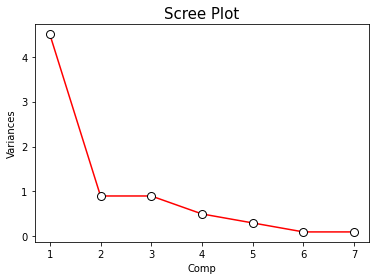

In [76]:
plt.title('Scree Plot',fontsize = 15)
plt.plot(range(1,len(per_var)+1),per_var,marker = 'o',markerfacecolor = 'w',markersize = 8,markeredgecolor='k',color = 'r')
plt.xticks(range(1,8))
plt.xlabel("Comp")
plt.ylabel("Variances")
plt.show()

- 7개 변수를 2개 주성분점수로 축약할 때 총분산의 74.6% 설명가능
- 팔꿈치 역시 주성분 개수 2일 때 존재

In [25]:
x_reduced = pca.transform(X_scale)

In [44]:
shape_value = x_reduced.shape[1]
scores = pd.DataFrame(x_reduced,columns=["Comp.{}".format(i) for i in range(1,shape_value+1)],index=df2.index)

In [46]:
scores.head()

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7
Joyner-Kersee (USA),4.859854,0.142870,0.006170,0.299727,0.369615,0.276321,-0.486110
John (GDR),3.215649,-0.968992,0.249166,0.560983,-0.769854,-0.385824,-0.052840
Behmer (GDR),2.989121,-0.710298,-0.635678,-0.566676,0.194444,0.263348,0.112927
Sablovskaite (URS),1.315841,-0.182857,-0.256023,0.650878,-0.616604,0.220398,0.542167
Choubenkova (URS),1.535787,-0.982459,-1.818885,0.800898,-0.602383,-0.081867,-0.307288


- 각 주성분의 선형식을 통해 각 선수별로 얻은 결과값

In [54]:
rotation = pd.DataFrame(pca.components_.T,columns=["PC{}".format(i) for i in range(1,8)],index=df2.columns[:-1])

In [55]:
rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
hurdles,0.450388,-0.057722,0.173935,0.048406,0.198894,-0.846651,-0.069617
highjump,0.314512,0.651332,0.208827,-0.556946,-0.070764,0.090075,0.331559
shot,0.402488,0.022021,0.153471,0.548267,-0.671665,0.098864,0.229043
run200m,0.427086,-0.185028,-0.130129,0.230959,0.617818,0.332794,0.469719
longjump,0.450964,0.024925,0.269759,-0.014683,0.121518,0.382944,-0.749408
javelin,0.242308,0.325722,-0.880699,0.060248,-0.078744,-0.071934,-0.211081
run800m,0.302907,-0.656505,-0.193002,-0.574181,-0.318802,0.052177,0.077186


<AxesSubplot:>

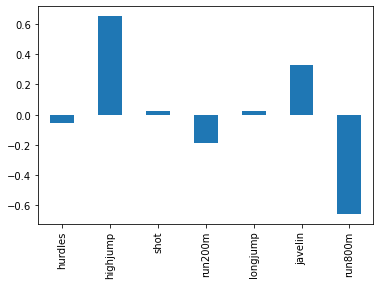

In [56]:
rotation['PC2'].plot.bar()

- PC2의 경우, -0.05 * hurdles + 0.65 * highjump + 0.02 * shot - 0.19 * run200m + 0.02 * longjump + 0.33 * javelin - 0.66 * run800m인 것을 알 수 있다.

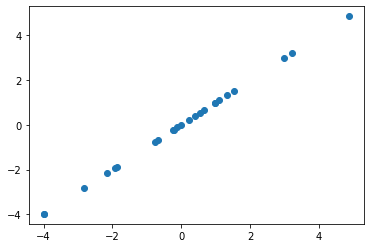

In [28]:
plt.scatter(np.matmul(X_scale, pca.components_[0]), x_reduced[:,0])
plt.show()

In [31]:
np.corrcoef(df2.score,x_reduced[:,0] )[0][1]

0.993116840423032

- 표준점수 시스템에 의한 점수와 첫번째 주성분점수와의 상관계수는 0.99

### 4) 행렬도(Biplot)
- 원변수와 주성분 점수와의 관계를 2차원 그래프로 표현하여 각 주성분의 의미와 관측치의 특성을 주성분 차원에서 탐색
- PC1과 PC2의 score 간의 산점도
- 화살표의 의미
    - 원변수와 PC간의 상관계수를 표현
    - PC와 평행할 수록 해당 PC에 큰 영향
    - 벡터의 길이가 원변수의 분산을 표현

In [98]:
def biplot(score,coeff, labels=None, index = X.index):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5,head_width = 0.01)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    for i in range(score.shape[0]):
        if index is None:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], str(i))
        else:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], index[i])
    plt.title("PCA - Biplot",fontsize = 15)
    plt.xlabel("Comp.{}".format(1))
    plt.ylabel("Comp.{}".format(2))
    plt.grid()

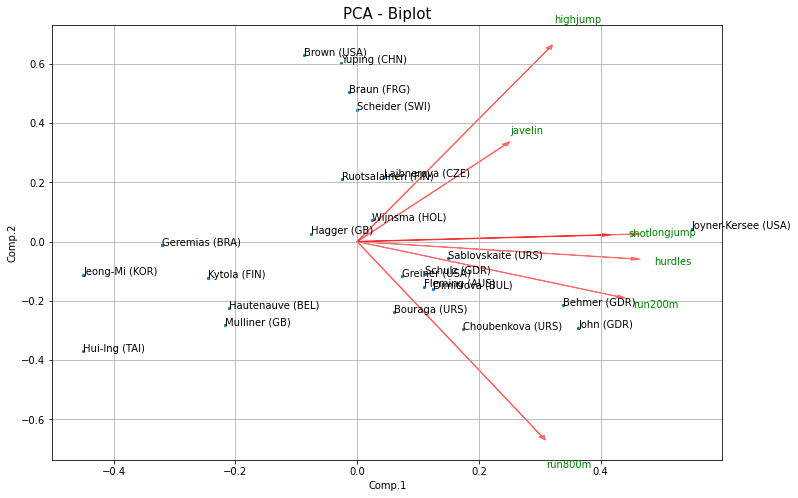

In [99]:
plt.figure(figsize=(12,8))
biplot(x_reduced[:,0:2],np.transpose(pca.components_[0:2, :]), X.columns )

- Joyner-Kersee는 hurdle, longjump, shot, run200에서 좋은 성적을 거둠
- run200m, hurdles, longjump, shot은 상관관계가 높음
- javeli과 highjump는 상관관계가 높음
- run800m은 다른 종목들과 비교적 상관관계가 적음
- PC1은 경쟁자들의 전체적인 점수에 의해서 분리
- PC2는 선수들이 각자 잘한 종목을 구분

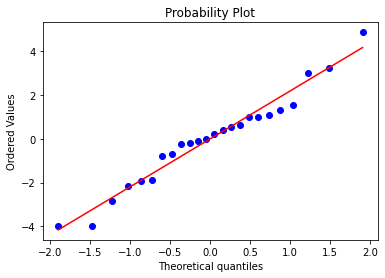

In [102]:
probplot(scores['Comp.1'],plot=plt)
plt.show()

In [103]:
stats.shapiro(scores['Comp.1'])

ShapiroResult(statistic=0.9693922996520996, pvalue=0.6519960165023804)

- shapiro의 p-value가 0.05보다 크기에 유의수준 0.05하에서 정규분포를 따른다고 볼 수 있다.

## 3. PCA를 활용한 회귀분석

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris().data

In [4]:
pca = PCA().fit(StandardScaler().fit_transform(iris))

In [5]:
per_var = np.round(pca.explained_variance_,decimals=1)

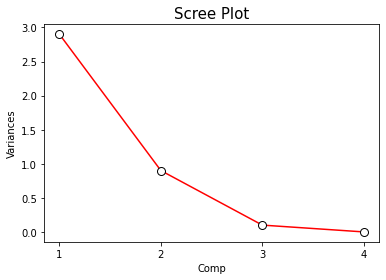

In [6]:
plt.title('Scree Plot',fontsize = 15)
plt.plot(range(1,len(per_var)+1),per_var,marker = 'o',markerfacecolor = 'w',markersize = 8,markeredgecolor='k',color = 'r')
plt.xticks(range(1,len(per_var)+1))
plt.xlabel("Comp")
plt.ylabel("Variances")
plt.show()

In [7]:
np.cumsum(pca.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

- 2개로 설명해도 충분한 설명력을 보이기에 2개를 선택

In [141]:
pca_df = pd.DataFrame(pca.transform(StandardScaler().fit_transform(iris))[:,:2],columns=['PC{}'.format(i) for i in range(1,3)])

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [147]:
y = load_iris().target

In [151]:
X = StandardScaler().fit_transform(iris)

In [153]:
clf = LogisticRegression(solver="sag",multi_class="multinomial").fit(X,y)
confusion_matrix(y,clf.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

In [154]:
clf = LogisticRegression(solver='sag',multi_class='multinomial').fit(pca_df,y)

In [155]:
confusion_matrix(y,clf.predict(pca_df))

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  5, 45]], dtype=int64)

- 살짝 차이가 나지만 어느정도 모델이 수렴하는 것을 알 수 있다.

In [156]:
clf = LogisticRegression(solver='sag', max_iter=1000, random_state=0,
                             multi_class="multinomial").fit(X[:,0:2], y)

In [157]:
confusion_matrix(y,clf.predict(X[:,0:2]))

array([[49,  1,  0],
       [ 0, 37, 13],
       [ 0, 14, 36]], dtype=int64)

- 위와 같이 차원축소를 통하여 모델의 복잡성을 줄이는 동시에 최대한 많은 정보를 활용하여 분석을 할 수 있다.